Atalov S. (TSI AUCA)

Introduction to Machine Learning and Artificial Intelligence

# Hyperparameter tuning

---

<img src = "https://eng.uber.com/wp-content/uploads/2021/07/Featured-Image.png" width = "500">

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

In [2]:
titanic_train = 'https://raw.githubusercontent.com/lobachevksy/teaching/main/titanic/train.csv'
df = pd.read_csv(titanic_train)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1. Data Preparation

In [3]:
df = df.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'])

In [4]:
df['Age'].fillna(value=df['Age'].mean(), inplace=True)

In [5]:
df['Embarked'].fillna(value=df['Embarked'].mode()[0], inplace=True)

In [6]:
df['Sex'].replace({'male': 0, 'female': 1}, inplace=True)

In [7]:
df = pd.get_dummies(df, columns = ['Embarked'])

In [8]:
X = df.copy()

y = X.pop('Survived')

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## 2. Modelling (Decision Tree Classifier)

#### TASK: Show the score on train and test data

In [10]:
model = DecisionTreeClassifier(random_state = 0)
model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9817415730337079, 0.7877094972067039)

In [11]:
# 20% -> Overfitting (high bias/variance???)

## 3. Model Tuning

#### TASK: Try to find the optimal depth of the Decision Tree Classifier Model (from 1 to 20).

In [12]:
model = DecisionTreeClassifier(random_state = 0, max_depth = 3)
model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.8342696629213483, 0.8212290502793296)

In [13]:
train_scores = []
test_scores = []

for depth in range(1, 30):
    model = DecisionTreeClassifier(random_state = 0, max_depth = depth)
    model.fit(X_train, y_train)
    # save scores
    train_scores.append( model.score(X_train, y_train) )
    test_scores.append( model.score(X_test, y_test) )


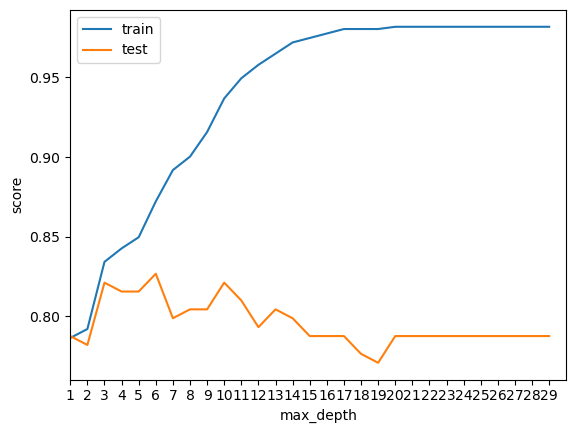

In [14]:
plt.plot(range(1, 30), train_scores, label='train');
plt.plot(range(1, 30), test_scores, label='test');
plt.xlabel('max_depth');
plt.ylabel('score');
plt.xlim(1, 30);
plt.xticks(range(1, 30))
plt.legend()
plt.show();

## 4. Random Forest Classifier Hyperparameter Tuning

In [15]:
model = RandomForestClassifier(random_state = 0)

model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9817415730337079, 0.8379888268156425)

In [16]:
model = RandomForestClassifier(random_state = 0, max_depth=5, n_estimators=100, min_samples_split=4)

model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.8525280898876404, 0.8379888268156425)

In [17]:
list_n_estimators = [10, 30, 50, 70, 100, 120, 150, 200, 300]
list_max_depth = [1, 2, 4, 6, 8, 10, 13, 17, 20, None]
list_min_samples_split = [2, 3, 5, 7, 9, 11, 15]

In [18]:
630

630

In [19]:
from tqdm import tqdm

In [ ]:
%%time
max_train = 0
max_test = 0

for n_est in tqdm(list_n_estimators):
    for depth in tqdm(list_max_depth):
        for min_s in tqdm(list_min_samples_split):
            model = RandomForestClassifier(
                random_state = 0,
                n_estimators = n_est,
                max_depth = depth,
                min_samples_split=min_s
            )

            model.fit(X_train, y_train)
            train_score = model.score(X_train, y_train)
            test_score = model.score(X_test, y_test)
                
            if test_score > max_test:
                
                max_train = train_score
                max_test = test_score 

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 29%|████████████████████████                                                            | 2/7 [00:00<00:00, 18.41it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 16.83it/s]

 10%|████████▎                                                                          | 1/10 [00:00<00:03,  2.37it/s]

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 29%|████████████████████████                                                            | 2/7 [00:00<00:00, 13.13it/s]

 57%|████████████████████████████████████████████████                                    | 4/7 [00:00<00:00, 16.45it/s]

100%|███████████████████████████

 43%|████████████████████████████████████                                                | 3/7 [00:00<00:00,  6.67it/s]

 57%|████████████████████████████████████████████████                                    | 4/7 [00:00<00:00,  6.74it/s]

 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:00<00:00,  5.21it/s]

 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:00<00:00,  5.81it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.07it/s]

 20%|████████████████▌                                                                  | 2/10 [00:02<00:09,  1.16s/it]

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 29%|████████████████████████                                                            | 2/7 [00:00<00:00,  7.80it/s]

 43%|███████████████████████████

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.55it/s]

 20%|████████████████▌                                                                  | 2/10 [00:01<00:05,  1.44it/s]

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|████████████                                                                        | 1/7 [00:00<00:00,  8.78it/s]

 43%|████████████████████████████████████                                                | 3/7 [00:00<00:00,  9.55it/s]

 57%|████████████████████████████████████████████████                                    | 4/7 [00:00<00:00,  8.37it/s]

 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:00<00:00,  8.41it/s]

 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:00<00:00,  7.48it/s]

100%|███████████████████████████

 29%|████████████████████████                                                            | 2/7 [00:00<00:00,  7.56it/s]

 43%|████████████████████████████████████                                                | 3/7 [00:00<00:00,  7.83it/s]

 57%|████████████████████████████████████████████████                                    | 4/7 [00:00<00:00,  7.94it/s]

 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:00<00:00,  7.89it/s]

 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:00<00:00,  8.19it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.19it/s]

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|████████████               

 14%|████████████                                                                        | 1/7 [00:00<00:00,  6.06it/s]

 29%|████████████████████████                                                            | 2/7 [00:00<00:00,  6.21it/s]

 43%|████████████████████████████████████                                                | 3/7 [00:00<00:00,  6.16it/s]

 57%|████████████████████████████████████████████████                                    | 4/7 [00:00<00:00,  5.86it/s]

 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:00<00:00,  6.11it/s]

 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:00<00:00,  6.28it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.19it/s]

 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:07<00:03,  1.06s/it]

  0%|                           

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|████████████                                                                        | 1/7 [00:00<00:01,  5.26it/s]

 29%|████████████████████████                                                            | 2/7 [00:00<00:00,  5.11it/s]

 43%|████████████████████████████████████                                                | 3/7 [00:00<00:00,  5.19it/s]

 57%|████████████████████████████████████████████████                                    | 4/7 [00:00<00:00,  4.85it/s]

 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:00<00:00,  4.99it/s]

 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:01<00:00,  5.06it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.12it/s]

 40%|███████████████████████████

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|████████████                                                                        | 1/7 [00:00<00:01,  5.01it/s]

 29%|████████████████████████                                                            | 2/7 [00:00<00:01,  4.57it/s]

 43%|████████████████████████████████████                                                | 3/7 [00:00<00:00,  4.52it/s]

 57%|████████████████████████████████████████████████                                    | 4/7 [00:00<00:00,  4.43it/s]

 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:01<00:00,  4.64it/s]

 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:01<00:00,  4.36it/s]

100%|███████████████████████████

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|████████████                                                                        | 1/7 [00:00<00:01,  3.83it/s]

 29%|████████████████████████                                                            | 2/7 [00:00<00:01,  3.52it/s]

 43%|████████████████████████████████████                                                | 3/7 [00:00<00:01,  3.66it/s]

 57%|████████████████████████████████████████████████                                    | 4/7 [00:01<00:00,  3.62it/s]

 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:01<00:00,  3.42it/s]

 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:01<00:00,  3.44it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.59it/s]

 80%|███████████████████████████

 40%|█████████████████████████████████▏                                                 | 4/10 [00:08<00:12,  2.02s/it]

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|████████████                                                                        | 1/7 [00:00<00:01,  3.23it/s]

 29%|████████████████████████                                                            | 2/7 [00:00<00:01,  3.09it/s]

 43%|████████████████████████████████████                                                | 3/7 [00:00<00:01,  3.14it/s]

 57%|████████████████████████████████████████████████                                    | 4/7 [00:01<00:00,  3.09it/s]

 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:01<00:00,  3.14it/s]

 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:01<00:00,  3.23it/s]

100%|███████████████████████████

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.10it/s]

 10%|████████▎                                                                          | 1/10 [00:03<00:30,  3.34s/it]

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|████████████                                                                        | 1/7 [00:00<00:01,  3.17it/s]

 29%|████████████████████████                                                            | 2/7 [00:00<00:01,  2.54it/s]

 43%|████████████████████████████████████                                                | 3/7 [00:01<00:01,  2.57it/s]

In [ ]:
max_train, max_test

## 5. Grid Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
list_n_estimators = [10, 30, 50, 70, 100, 120, 150, 200, 300]
list_max_depth = [1, 2, 4, 6, 8, 10, 11, 12, 13, 17, 20, None]
list_min_samples_split = [2, 3, 5, 7, 9, 11, 15]

In [ ]:
grid = {'n_estimators': list_n_estimators,
        'max_depth': list_max_depth,
        'min_samples_split': list_min_samples_split}

In [ ]:
grid

In [ ]:
model = RandomForestClassifier(random_state = 0)

In [ ]:
search = GridSearchCV(estimator = model,
                      param_grid = grid,
                      n_jobs = -1,
                      cv = 3)

In [ ]:
%%time
search.fit(X, y)

In [ ]:
search.best_score_

In [ ]:
search.best_params_

In [ ]:
model = RandomForestClassifier(random_state=0,
                               max_depth = 10,
                               min_samples_split = 9,
                               n_estimators = 150)



model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

## 6. Randomized Search CV
Trade-off between execution time and solution quality.


#### TASK: Try to solve the problem of model hyperparameter tuning by Random Search CV algorithm:

In [ ]:
from random import randint
%%time
max_train = 0
max_test = 0

list_n_estimators = [randint(50, 200) for _ in range(10)]  # Randomly select 10 values between 50 and 200
list_max_depth= [randint(10, 50) for _ in range(10)]  # Randomly select 10 values between 10 and 50
list_min_samples_split = [randint(2, 10) for _ in range(10)]  # Randomly select 10 values between 2 and 10

for n_est in tqdm(list_n_estimators):
    for depth in tqdm(list_max_depth):
        for min_s in tqdm(list_min_samples_split):
            model = RandomForestClassifier(
                random_state = 0,
                n_estimators = n_est,
                max_depth = depth,
                min_samples_split=min_s
            )

            model.fit(X_train, y_train)
            train_score = model.score(X_train, y_train)
            test_score = model.score(X_test, y_test)
                
            if test_score > max_test:
                
                max_train = train_score
                max_test = test_score 